In [1]:
import Pkg
Pkg.add("Revise")
Pkg.add("IonSim")
Pkg.add("QuantumOptics")
Pkg.add("StochasticDiffEq")
Pkg.add("DSP")
using PyPlot
using Revise
using IonSim
using QuantumOptics: timeevolution, stochastic, Basis

    Updating registry at `C:\Users\jewoo\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`


In [2]:
C = Ca40([("S1/2", -1/2, "g"),("D5/2", -1/2, "e")])
# Create aliases for the qubit states for easier access
#set_sublevel_alias!(C, Dict("g" => ("S1/2", -1/2), "e" => ("D5/2", -1/2)))

# Define the trap configuration. We'll model a single ion in a linear chain
# with a 1 MHz axial motional frequency.
chain = LinearChain(
    ions=[C],
    comfrequencies=(x=3e6, y=3e6, z=1e6),   
    selectedmodes=(;z=[1]) # We only consider the axial mode of motion
)

# Define the laser that will drive the transition
L = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T = Chamber(
    iontrap=chain,
    B=0.37e-3,              # Magnetic field in Tesla
    #δB = 0.1,
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L]
)

polarization!(L, (x̂ - ẑ)/√2)
wavevector!(L, (x̂ + ẑ)/√2);
wavelength_from_transition!(L, C, ("g", "e"), T)
intensity_from_pitime!(L, 4e-6, C, ("g", "e"), T);

ion = ions(T)[1]

ψ0_ion_1 = ion["g"]
ψ0_ion_2 = ion[("S1/2", -1/2)]
ψ0_ion_3 = ionstate(ion, "g")

print(ψ0_ion_1)
mode = modes(T)[1]

ψ0_mode_1 = mode[0]
ψ0_mode_2 = fockstate(mode, 0)
ψ0_mode_3 = groundstate(mode)

print(ψ0_mode_1)
ψ₀ = ion["g"] ⊗ mode[0];

Ket(dim=2)
  basis: ⁴⁰Ca
 1.0 + 0.0im
 0.0 + 0.0imKet(dim=11)
  basis: VibrationalMode(ν=1.0e6, axis=ẑ, N=10)
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [260]:
function pulse(T:: Chamber , tspan, pitime, del_intensity)
    # Define the laser that will drive the transition
    L = T.lasers[1]

    # Combine all components into a single Trap object, which represents the full experiment
    # This is the main object that holds the entire state of our physical system.
    
    pi2_time = pitime*1e6/2

    res_intensity = intensity_from_pitime(L, pi2_time, T.iontrap.ions[1], ("g", "e"), T)

    intensity!(L, (res_intensity .+ del_intensity))


    h = hamiltonian(T, timescale=1e-6, rwa_cutoff=Inf);
    return h
end


function experiment(T::Chamber, wait_time, del_intensity)
    pitime = 4e-6
    tspan = 0: 0.1: (wait_time + 4)

    h = pulse(T, tspan, pitime, del_intensity)
    return h
end

# phase!(L, phase_funtion)
# h = hamiltonian(T, timescale=1e-6, rwa_cutoff=Inf);

experiment (generic function with 1 method)

λ: 7.291469963176486e-7 m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 3.000000000004124e6 W/m²
ϕ(t=0): 0.0 ⋅ 2π
λ: 7.291469963176486e-7 m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 4.000000000004124e6 W/m²
ϕ(t=0): 0.0 ⋅ 2π


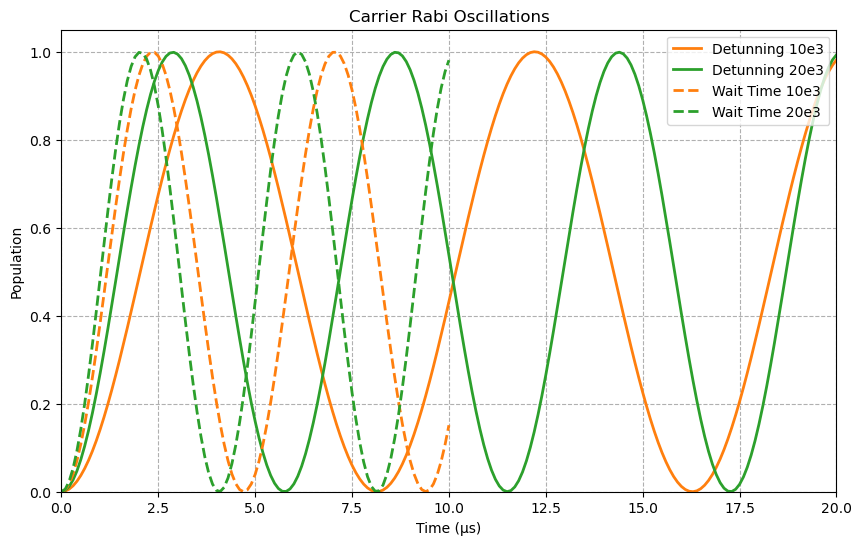

In [261]:
 tspan = 0:0.1:20
# # Solve the time evolution using the Schrödinger equation solver from QuantumOptics.jl
# #h = pulse(T, tspan, 4e-6
# h = experiment(T, 16)
# tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)


# # 5. Analyze and Visualize the Results
# # Calculate the population in the excited state |e⟩ over time
# excited_pop = expect(ionprojector(T, "e"), sol)
# print(L)



L1 = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T1 = Chamber(
    iontrap=chain,
    B=0.37e-3,              # Magnetic field in Tesla
    #δB = 0.1,
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L1]
)
polarization!(L1, (x̂ - ẑ)/√2)
wavevector!(L1, (x̂ + ẑ)/√2);
wavelength_from_transition!(L1, C, ("g", "e"), T1)
#h1 = pulse(T1, tspan, 4e-6)
h1 = experiment(T1, 16, 1e6)
tspan1 = 0:0.1:10
#h1_wait = pulse(T1, tspan1, 4e-6)
h1_wait = experiment(T1, 6, 3e6)
tout1, sol1 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h1)
excited_pop1 = expect(ionprojector(T1, "e"), sol1)

tout1_wait, sol1_wait = timeevolution.schroedinger_dynamic(tspan1, ψ₀, h1_wait)
excited_pop1_wait = expect(ionprojector(T1, "e"), sol1_wait)
print(L1)


L2 = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T2 = Chamber(
    iontrap=chain,
    B=0.37e-3,              # Magnetic field in Tesla
    δB = 1e-6,
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L2]
)
polarization!(L2, (x̂ - ẑ)/√2)
wavevector!(L2, (x̂ + ẑ)/√2);
wavelength_from_transition!(L2, C, ("g", "e"), T2)

#h2 = pulse(T2, tspan, 4e-6)
h2 = experiment(T2, 16, 2e6)
h2_wait = experiment(T2, 6, 4e6)
tout2, sol2 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h2)

excited_pop2 = expect(ionprojector(T2, "e"), sol2)

tout2_wait, sol2_wait = timeevolution.schroedinger_dynamic(tspan1, ψ₀, h2_wait)
excited_pop2_wait = expect(ionprojector(T2, "e"), sol2_wait)

print(L2)



# Create the plot using PyPlot
figure(figsize=(10, 6))
#plot(tout, real.(excited_pop), label="Excited State Population", color="C0", linewidth=2)
plot(tout1, real.(excited_pop1), label="Detunning 10e3", color="C1", linewidth=2)
plot(tout2, real.(excited_pop2), label="Detunning 20e3", color="C2", linewidth=2)


plot(tout1_wait, real.(excited_pop1_wait), label="Wait Time 10e3", color="C1", linestyle="--", linewidth=2)
plot(tout2_wait, real.(excited_pop2_wait), label="Wait Time 20e3", color="C2", linestyle="--", linewidth=2)


xlim(0, 20)
xlabel("Time (μs)")
ylabel("Population")
title("Carrier Rabi Oscillations")
ylim(0, 1.05)
grid(true, linestyle="--")
legend()
show()
display(gcf())


In [262]:
function detuning_intensity(L::Laser, del_intensity, cnt)
    L1 = Laser()

    T1 = Chamber(
        iontrap=chain,
        B=0.37e-3,              # Magnetic field in Tesla
        #δB = 0.1,
        Bhat=ẑ,              # Magnetic field direction
        lasers=[L1]
    )
    polarization!(L1, (x̂ - ẑ)/√2)
    wavevector!(L1, (x̂ + ẑ)/√2);
    wavelength_from_transition!(L1, C, ("g", "e"), T1)
    h1 = experiment(T1, 16, del_intensity)
    tspan1 = 0:0.1:10
    tout1, sol1 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h1)
    excited_pop1 = expect(ionprojector(T1, "e"), sol1)
    plot(tout1, real.(excited_pop1), label="Detunning intensity $del_intensity", color = "C$cnt", linewidth=2)
    return tout1, real.(excited_pop1)

end

detuning_intensity (generic function with 2 methods)

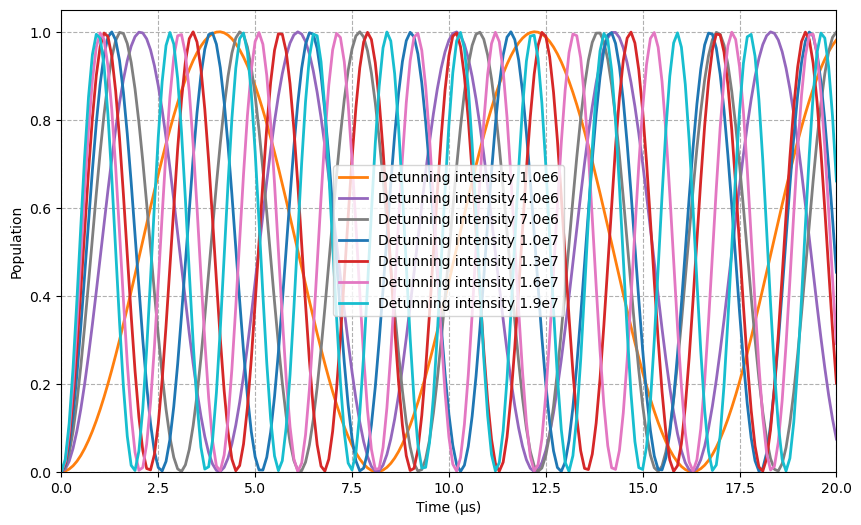

In [263]:
figure(figsize=(10, 6))


for i in 1:3:20
    detuning_intensity(L, i*1e6, i)
end

xlim(0, 20)
xlabel("Time (μs)")
ylabel("Population")
ylim(0, 1.05)
grid(true, linestyle="--")
legend()
show()
display(gcf())

In [264]:
Pkg.add("NumPyArrays")

   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`


[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 1

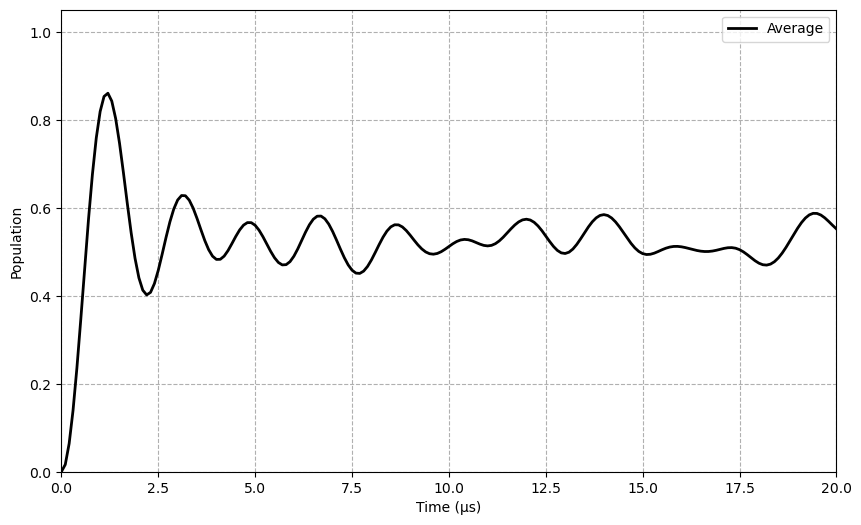

In [321]:
figure(figsize=(10, 6))

tout, ind = detuning_intensity(L, 10*1e6, 1)
println(tout)
println( ind)
for i in 1:1:20
    tout, indi = detuning_intensity(L, i*1e6, i)
    ind .+= (indi)
end
clf()
figure(figsize=(10, 6))
plot(tout, ind / length(1:1:20), label="Average", color = "black", linewidth=2)

xlim(0, 20)
xlabel("Time (μs)")
ylabel("Population")
ylim(0, 1.05)
grid(true, linestyle="--")
legend()
show()
display(gcf())

In [315]:
function detuning_intensity1(L::Laser, del_intensity, cnt, t_wait)
    L1 = Laser()

    T1 = Chamber(
        iontrap=chain,
        B=0.37e-3,              # Magnetic field in Tesla
        #δB = 0.1,
        Bhat=ẑ,              # Magnetic field direction
        lasers=[L1]
    )
    polarization!(L1, (x̂ - ẑ)/√2)
    wavevector!(L1, (x̂ + ẑ)/√2);
    wavelength_from_transition!(L1, C, ("g", "e"), T1)
    h1 = experiment(T1, t_wait+4, del_intensity)
    tspan = 0:0.1:t_wait
    x, y = timeevolution.schroedinger_dynamic(tspan, ψ₀, h1)
    excited_pop1 = expect(ionprojector(T1, "e"), y)
    return x, real.(excited_pop1[end])

end

detuning_intensity1 (generic function with 1 method)

In [311]:

figure(figsize=(10, 6))
I_rms_1 = 10
noise_distribution_1 = Normal(0, I_rms_1)
δB_shot = rand(noise_distribution_1)

7.135774461708156

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0]
0.13039206219177393
Any[0.0011130814802430577, 0.0024707650539559185, 0.010465077630836327, 0.025454921812658522, 0.028542626650364035, 0.0533721209500196, 0.07114521579428028, 0.06900395276305511, 0.09175586795785938, 0.11409859159261326, 0.11328471178629354, 0.13960318677495545, 0.19825020730238205, 0.20462838959709365, 0.30002955311063906, 0.3097372227910832, 0.19536426382706557, 0.4302038277606397, 0.2820983771026759, 0.2968191555404419, 0.37232056337440744, 0.294881832196569, 0.55885

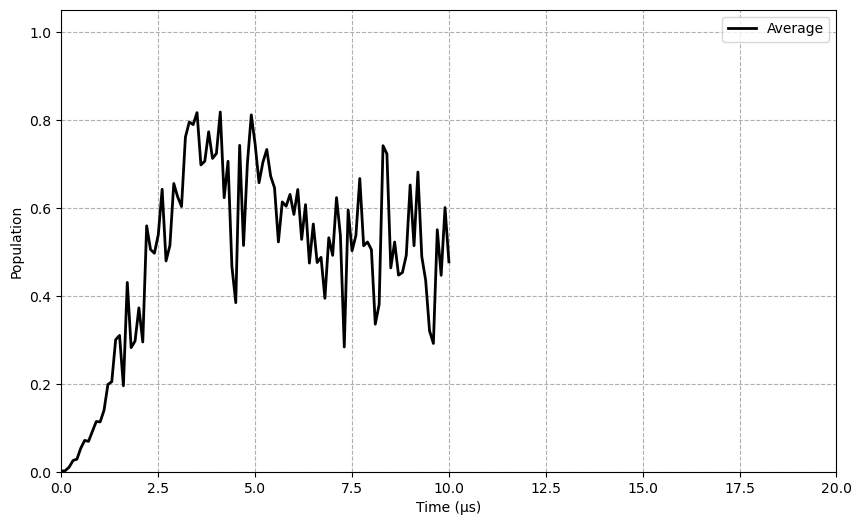

In [317]:

figure(figsize=(10, 6))
I_rms_1 = 10
noise_distribution_1 = Normal(0, I_rms_1)
tout, ind = detuning_intensity1(L, 10*1e6, 1, 10)
println(tout)
println( ind)
sumB=0.0
ind = []
for j in 1:1:101
    sumB=0.0
    for i in 1:1:10
        δB_shot = rand(noise_distribution_1)
        tout1, indi = detuning_intensity1(L, abs(δB_shot*1e3), i, j)
        sumB= sumB + (indi)
    end
   
    push!(ind, sumB/10)
end
println(ind)
plot(tout, ind , label="Average", color = "black", linewidth=2)

xlim(0, 20)
xlabel("Time (μs)")
ylabel("Population")
ylim(0, 1.05)
grid(true, linestyle="--")
legend()
show()
display(gcf())

In [305]:
Pkg.add("ProgressMeter")
using Distributions # You'll need to add this package!
using ProgressMeter # For a nice progress bar

   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`


[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 1

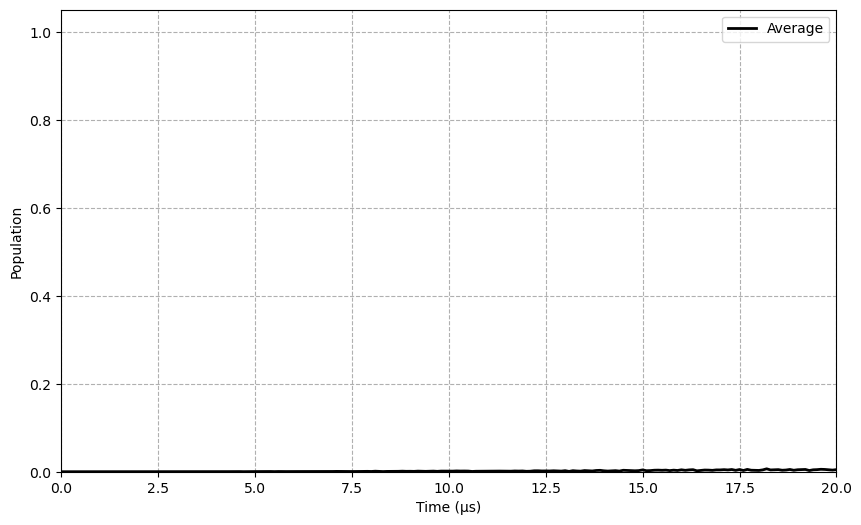

In [324]:

figure(figsize=(10, 6))
I_rms_1 = 1
noise_distribution_1 = Normal(0, I_rms_1)
println(tout)
println( ind)
sumB=0.0
ind = []
for j in 1:1:201
    sumB=0.0
    for i in 1:1:10
        δB_shot = rand(noise_distribution_1)
        tout1, indi = detuning_intensity1(L, abs(δB_shot), i, j)
        sumB= sumB + (indi)
    end
   
    push!(ind, sumB/10)
end
println(ind)
plot(tout, ind , label="Average", color = "black", linewidth=2)

xlim(0, 20)
xlabel("Time (μs)")
ylabel("Population")
ylim(0, 1.05)
grid(true, linestyle="--")
legend()
show()
display(gcf())